# Problema 3, 4 y 5

## 3)

Los métodos de **Bisección (B), Newton-Raphson (N-R) y Secante (S)** sirven para encontrar las *raíces* de una función. Por ello, para encontrar <br> <center> $x_{0}$: $x_0 = cos(x_0)$ </center> <br> Pido <br> <center> $f(x) = cos(x) - x = 0$ </center> <br>

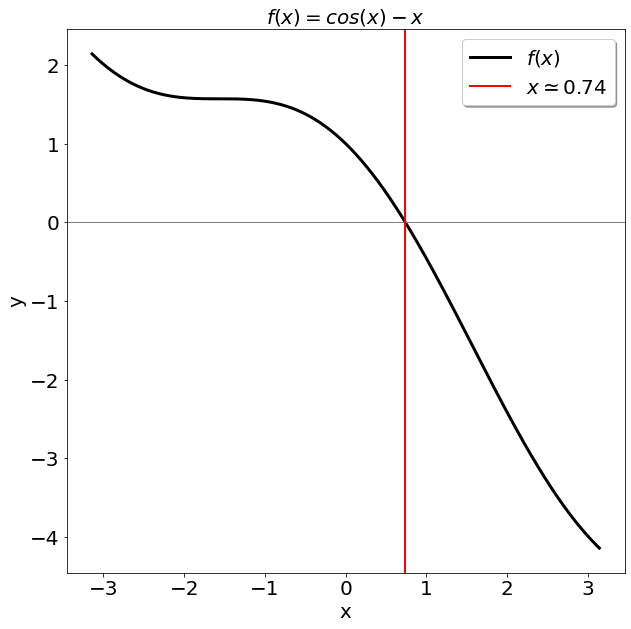

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi

x = np.linspace(-pi, pi, 1000) #dominio que comienza en 0, termina en 2*pi, y tiene 100 pasos
y = np.cos(x) - x

plt.figure(figsize=(10,10))
plt.plot(x,y,'k',label='$f(x)$',lw=3)
plt.grid(False)
plt.xticks(size=20)
plt.yticks(size=20)
#plt.ylim(-1,1)
#plt.xlim(0,2)
plt.axhline(y = 0,color='gray',lw=1)
plt.axvline(x = 0.74,color='red',lw=2,label='$x \simeq 0.74$')
plt.title('$f(x)=cos(x)-x$',size=20)
plt.legend(fontsize=20,shadow=True)
plt.xlabel('x',size=20)
plt.ylabel('y',size=20);

##### <center> Caption: Función a la cual le vamos a buscar las raíces, para encontrar $x_{0}$. Indicamos un valor aproximado, a ojo, de un posible valor de $x_0$ </center>

Comencemos aplicando **Bisección**: <br> La idea principal es definir 2 puntos $(x_l , x_u)$ tal que si se cumple que <br>
<center> $f(x_l) \cdot f(x_u) < 0 \Rightarrow sgn(f(x_l)) = -sgn(f(x_u)$ </center> <br>
Y si la función es continua, esto es lo mismo que decir que <br>
<center> $\exists x_0 \in (x_l,x_u) : f(x_0) = 0$ </center> <br>
Luego, para acercarme a la raiz que busco, tiro un nuevo guess inicial $x_m = \frac{x_l + x_u}{2}$ y defino un nuevo bracket: <br>
<center> $f(x_l) \cdot f(x_m) > 0 \Rightarrow \tilde{x}_l = x_m$ </center> <br>
E iteramos hasta que el tamaño del bracket sea lo suficientemente pequeño. <br>
Para comenzar a buscar la raiz, debemos dar el bracket inicial que encierre a $x_0$ (de valor desconocido), suponiendo un valor original. <br>
Probamos con $x_l = 0.5$ y $x_u = 1$: <br>

### Inicio código

In [5]:
#nuestra función será
def f(x):
    y = np.cos(x)-x
    return y

#Bisección:

#Busquemos la raíz reduciendo el tamaño de brackets iniciales:

xl = 0.5
xu = 1 #bra og
i = 0 #contar el número de iteraciones
e = abs(xu-xl) #error

E_bisec = [] #PAr agiardar la convergencia
E_bisec.append(e)

while e > 10**-6 and i < 1000: #el loop se corta cuando se llega a la precisión requerida o se pasa el número de iteraciones
    
    i += 1 #contando
    xm = 0.5*(xl+xu) #punto medio
    #rint(xl,xm,xu,i) #para saber qué está haciendo
    if f(xl)*f(xm) < 0: #test para nuevo bracket
        xu = xm
    elif f(xl)*f(xm) == 0:
        print('La raíz de f(x) es',xm)
    else:
        xl = xm
        
    e = abs(xu - xl) #test del error
    E_bisec.append(e)
           
print('La raíz de f(x) es',xm,'con un error de',e,'tras',i,'iteraciones.')

La raíz de f(x) es 0.7390851974487305 con un error de 9.5367431640625e-07 tras 19 iteraciones.


### Fin código

Continuemos con el método de **N-R**: <br>
Este método aprovecha la expansión a 1º orden de $f(x)$ <br>
<center> $f(x) \approx f(x_0) + (x-x_0)f'(x_0)$ </center> <br>
Si busco la raiz <br>
<center> $f(x) = 0 \Rightarrow x \approx x_0 - \frac{f(x_0)}{f'(x_0)}$ </center> <br>
Y debo proponer un guess inicial $x_0$ para, iterativamente, encontrar cada vez mejores aproximaciones $x = x_i$ al valor real de la raiz.

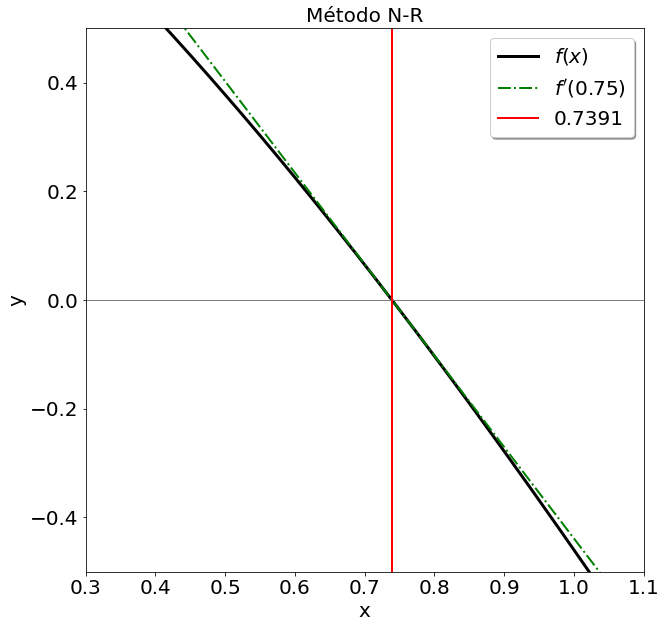

In [6]:
x = np.linspace(-pi, pi, 1000) #dominio que comienza en 0, termina en 2*pi, y tiene 100 pasos
y = np.cos(x) - x
z = np.cos(0.75) - 0.75 + (x - 0.75)*-(np.sin(0.75)+1)
guess = 0.75 - (np.cos(0.75) - 0.75)/(-(np.sin(0.75)+1))

plt.figure(figsize=(10,10))
plt.plot(x,y,'k',label='$f(x)$',lw=3)
plt.plot(x,z,'g',label="$f'(0.75)$",lw=2,ls='-.')
plt.grid(False)
plt.xticks(size=20)
plt.yticks(size=20)
plt.ylim(-0.5,0.5)
plt.xlim(0.3,1.1)
plt.axhline(y = 0,color='gray',lw=1)
plt.axvline(x = guess,color='red',lw=2,label='%1.4f' %guess)
plt.title('Método N-R',size=20)
plt.legend(fontsize=20,shadow=True)
plt.xlabel('x',size=20)
plt.ylabel('y',size=20);

##### <center> Caption: Recta tangente a $f(x)$ en el guess inicial propuesto para N-R

En este caso $f'(x) = -sen(x) - 1$, y propongo un guess inicial $x_0 = 0.75$.

### Inicio código

In [7]:
def g(x): #f'
    z = np.sin(-x)-1 #f' = -sen(x)-1 y sen(-x)= -sen(x)
    return z

#N-R:

#Ahora quiero dar 1 valor de x inicial para comenzar el loop, pero que no se salga del bracket inicial:

xl = 0.5
xu = 1
xi = 0.75 #guess inicial
xj = 0.75 #espacio para guardar

i = 0
e = abs(xu-xl)

E_NR = []
E_NR.append(e)

while e > 10**-6 and i < 1000:
    
    i += 1 #contando
    
    xj = xi #guardamos el guess anterior
    
    #test de que cae adentro del bracket inicial:
    
    if xl < xj < xu:
        xi = xi - f(xi)/g(xi) #nuevo guess
    else:
        xi = 0.5*(xl+xu) #punto medio
        #test para nuevo bracket
        if f(xl)*f(xi) < 0: 
            xu = xi
        elif f(xl)*f(xi) == 0:
            print('La raíz de f(x) es',xi)
        else:
            xl = xi 
    
    e = abs(xj-xi) #error
    E_NR.append(e)

print('La raíz de f(x) es',xi,'con un error de',e,'tras',i,'iteraciones.')

La raíz de f(x) es 0.7390851332151607 con un error de 1.4932388658905893e-10 tras 3 iteraciones.


### Fin código

Por último, usemos el método de la **Secante**: <br>
Es similar a N-R, sólo que no utilizamos la forma analítica de $f'(x)$ a 1º orden, sino una aproximación, utilizando la recta que une $(x_l,f(x_l))$ y $(x_u,f(x_u))$. <br>
En este caso, volvamos a pedir $x_l = 0.5$ y $x_u = 1$

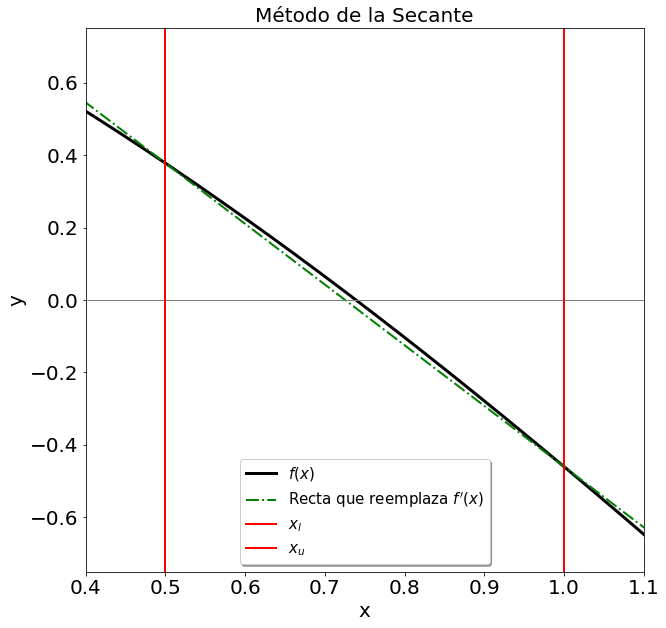

In [8]:
x = np.linspace(-pi, pi, 1000) #dominio que comienza en 0, termina en 2*pi, y tiene 100 pasos
y = np.cos(x) - x
F = (f(1) - f(0.5))/(1 - 0.5)
z = F*x + (f(1) - F)

plt.figure(figsize=(10,10))
plt.plot(x,y,'k',label='$f(x)$',lw=3)
plt.plot(x,z,'g',label="Recta que reemplaza $f'(x)$",lw=2,ls='-.')
plt.grid(False)
plt.xticks(size=20)
plt.yticks(size=20)
plt.ylim(-0.75,0.75)
plt.xlim(0.4,1.1)
plt.axhline(y = 0,color='gray',lw=1)
plt.axvline(x = 0.5,color='red',lw=2,label='$x_l$')
plt.axvline(x = 1,color='red',lw=2,label='$x_u$')
plt.title('Método de la Secante',size=20)
plt.legend(fontsize=15,shadow=True)
plt.xlabel('x',size=20)
plt.ylabel('y',size=20);

##### <center> Caption: Recta definida para encontrar el nuevo guess en el método de la Secante. </center>
### Inicio código

In [9]:
#Secante (NR pero aproximando f'):

#Para que no se salga del bracket inicial:

xl = 0.5
xu = 1
xi = 0.75 #guess inicial
xj = xu #espacio para guardar

i = 0
e = abs(xu-xl)

E_sec = []
E_sec.append(e)

#ojo, me está jodiendo que acá no necesito 1 guess, sino 2 pts para hacer la recta (que reeemplaza a f')

while e > 10**-6 and i < 1000:
    i += 1 #contando
    
    if xl <= xj <= xu: #test para que caiga dentro del bracket
        
        g = (f(xi)-f(xj))/(xi-xj) #def la derivada f' (antes de cambiar xj para tener 2 pts distintos)
    
        xj = xi #guardo el paso anterior
        xi = xi - f(xi)/g #nuevo guess
    
    else: #si cae fuera, bisección
        xi = 0.5*(xl+xu) #punto medio
        #test para nuevo bracket
        if f(xl)*f(xi) < 0: 
            xu = xi
        elif f(xl)*f(xi) == 0:
            print('La raíz de f(x) es',xm)
        else:
            xl = xi 
    
    e = abs(xj-xi) #error
    E_sec.append(e)
    
print('La raíz de f(x) es',xi,'con un error de',e,'tras',i,'iteraciones.')

La raíz de f(x) es 0.7390851332151607 con un error de 1.5620571502950042e-10 tras 4 iteraciones.


### Fin código

Veamos además la convergencia de cada uno de estos métodos: <br>
En cada uno de los *runs* pedimos que el programa corte cuando el error sea menor a $10^{-6}$, y vemos que para muy pocas iteraciones los métodos que involucran las derivadas a 1º orden de la función convergen.

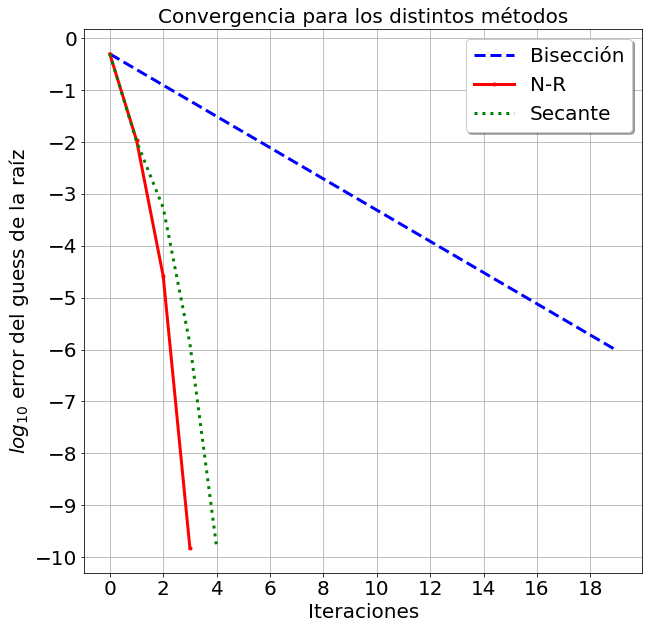

In [10]:
#Bis => 19 it
#NR => 3 it
#Sec => 4 it. Veamos:

plt.figure(figsize=(10,10))
plt.plot([i for i in range(len(E_bisec))],np.log10(E_bisec),'b--',label='Bisección',lw=3)
plt.plot([i for i in range(len(E_NR))],np.log10(E_NR),'r.-',label='N-R',lw=3)
plt.plot([i for i in range(len(E_sec))],np.log10(E_sec),'g:',label='Secante',lw=3)
plt.grid(True)
plt.xticks([2*i for i in range(len(E_bisec)//2)],size=20)
plt.yticks([i for i in range(-10,1)],size=20)
plt.title('Convergencia para los distintos métodos',size=20)
plt.legend(fontsize=20,shadow=True)
plt.xlabel('Iteraciones',size=20)
plt.ylabel('$log_{10}$ error del guess de la raíz',size=20);

##### <center> Caption: Comparación de cómo disminuye el error tras cada iteración, según el método utilizado.

Luego, encontramos que <br>
<center> $x = cos(x) \Rightarrow x_0 = 0.7390851332 \pm 2 \cdot 10^{-10}$ </center>

## 4)

En este caso, tenemos que <br>
<center> $f(x) = e^x - 2x - 1$ </center> <br>

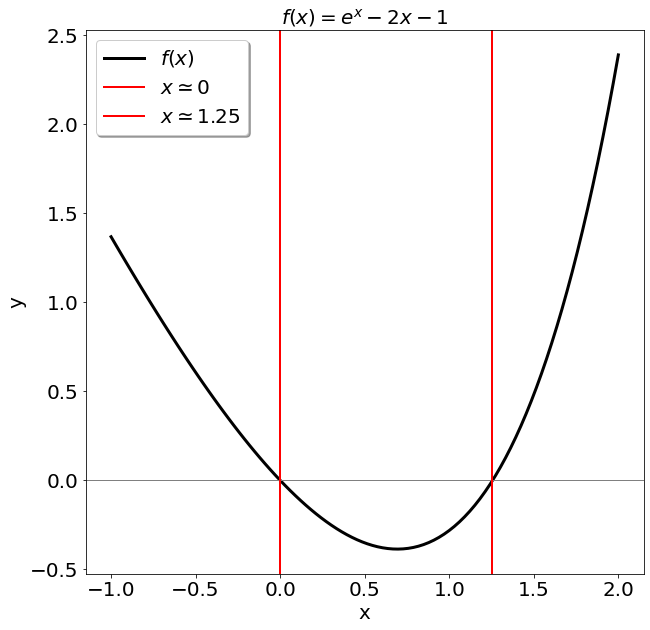

In [11]:
x = np.linspace(-1, 2, 100) 
y = np.exp(x) - 2*x -1

plt.figure(figsize=(10,10))
plt.plot(x,y,'k',label='$f(x)$',lw=3)
plt.xticks(size=20)
plt.yticks(size=20)
#plt.ylim(-1,1)
#plt.xlim(0,2)
plt.axhline(y = 0,color='gray',lw=1)
plt.axvline(x = 0,color='red',lw=2,label='$x \simeq 0$')
plt.axvline(x = 1.25,color='red',lw=2,label='$x \simeq 1.25$')
plt.title('$f(x)=e^x-2x-1$',size=20)
plt.legend(fontsize=20,shadow=True)
plt.xlabel('x',size=20)
plt.ylabel('y',size=20);

##### <center> Caption: $f(x)$ y las potenciales ubicaciones de las 2 raíces, elegidas a ojo.

Como quiero encontrar $x_0 : f(x_0) = 0$, puedo despejar $x$ de 2 maneras: <br>
<center> $x = \frac{e^x - 1}{2} = g(x)$ </center> <br>
<center> $x = log(2x + 1) = \tilde{g}(x)$ </center> <br>
Graficamos estas 2 funciones: buscamos dónde cortan a la identidad (donde se cumpla la igualdad, proveniente de despejar x). <br> Lo interesante acá es que $\tilde{g}(x)$ no está definida en $x < -0.5$, por lo que hay que tener cuidado al elegir los brackets. <br>
Entonces utilicemos los 3 métodos definidos en el Problema 3 (B, N-R y S) para obtener los valores de las 2 raíces ($x_1$ y $x_2$) de la función original, para cada 1 de las 2 formas distintas que obtuvimos ($g(x)$ y $\tilde{g}(x)$).

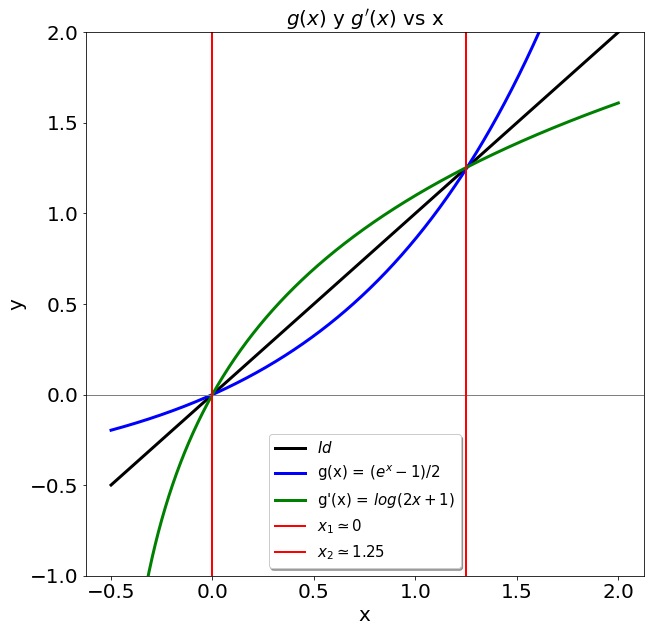

In [14]:
x = np.linspace(-0.499, 2, 1000) #z(x) no está definida para x =< -0.5
y = (np.exp(x) -1)/2
z = np.log((2*x)+1) #2**x

plt.figure(figsize=(10,10))
plt.plot(x,x,'k',label='$Id$',lw=3)
plt.plot(x,y,'b',label='g(x) = $(e^x-1)/2$',lw=3)
plt.plot(x,z,'g',label="g'(x) = $log(2x+1)$",lw=3)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid(False)
plt.ylim(-1,2)
#plt.xlim(0,2)
plt.axhline(y = 0,color='gray',lw=1)
plt.axvline(x = 0,color='red',lw=2,label='$x_1 \simeq 0$')
plt.axvline(x = 1.25,color='red',lw=2,label='$x_2 \simeq 1.25$')
plt.title("$g(x)$ y $g'(x)$ vs x",size=20)
plt.legend(fontsize=15,shadow=True)
plt.xlabel('x',size=20)
plt.ylabel('y',size=20);

##### <center> Caption: Las distintas funciones que aparecen de despejar de distintos términos $x$ y las raíces propuestas. </center>
#### *Comenzamos haciendo los 3 métodos para la forma con la $e^x$ ("1º") y luego repetimos para la que tiene ln(x) ("2º").*

### *i)* <center> $\frac{e^x - 1}{2} - x = 0$ </center> <br>

**Bisección:** <br> Mis brackets iniciales serán:
<center> $x_1 \in [-0.4,0.5] \text{ y } x_2 \in [0.9,1.5]$ </center> <br>
Y los resultados vendrán de aplicar el mismo código pero cambiando $f$

### Inicio código

In [13]:
#(De la func og) Las raíces son 2: 0 y ~1.25. Entonces definamos 2 brackets para comenzar: (-0.4,0.5) y (0.9,1.5) (no tan simétricos)

#nuestra función 1 será

def f(x):
    y = (np.exp(x) -1)/2 - x
    return y

#Bisección:

def bisec(xl,xu): #xl = xmin del bracket; xu = xmax del bracket
    
    global i
    global e
    global xm #para poder callear a las variables afuera de la func
    
    i = 0 #contar el número de iteraciones
    e = abs(xu-xl) #error
        
    while e > 10**-6 and i < 1000: #el loop se corta cuando se llega a la precisión requerida o se pasa el número de iteraciones
    
        i += 1 #contando
        xm = 0.5*(xl+xu) #punto medio
        #print(xl,xm,xu,i) #para saber qué está haciendo
        if f(xl)*f(xm) < 0: #test para nuevo bracket
            xu = xm
        
        elif f(xl)*f(xm) == 0:
            print('La raíz de f(x) es',xm)
            e = 0
            break
        
        else:
            xl = xm
        
        e = abs(xu - xl) #test del error
        
    return #fin de la func de bisección

#1º raíz:

bisec(-0.4,0.5)
           
print('La 1º raíz de f(x) es',xm,'con un error de',e,'tras',i,'iteraciones.')

#2º raíz:

bisec(0.9,1.5)
           
print('La 2º raíz de f(x) es',xm,'con un error de',e,'tras',i,'iteraciones.')

La 1º raíz de f(x) es -6.675720214967108e-07 con un error de 8.58306884765625e-07 tras 20 iteraciones.
La 2º raíz de f(x) es 1.2564313888549803 con un error de 5.722045899325678e-07 tras 20 iteraciones.


### Fin código

**N-R:** <br>
Calculemos las derivadas $g'(x)$ y $\tilde{g}'(x)$, necesarias para el método: <br>
<center> $g'(x) = \frac{e^x}{2} - 1$ </center> <br>
<center> $\tilde{g}'(x) = \frac{1}{x+\frac{1}{2}} - 1$ </center> <br>	
Y mis guesses iniciales serán
<center> $x_{1,0} = 0.05 \textit{ y } x_{2,0} = 1.2$ </center> <br>

### Inicio código

In [15]:
def g(x): #f'
    z = np.exp(x)/2 - 1 #f'
    return z

#Ahora quiero dar 1 valor de x inicial para comenzar el loop, pero que no se salga del bracket inicial:

def NR(xl,xu): #xl = xmin del bracket; xu = xmax del bracket
    
    global i
    global e
    global xi #para poder callear a las variables afuera de la func

    xi = 0.5*(xl+xu) #guess inicial
    xj = xi #espacio para guardar

    i = 0
    e = abs(xu-xl)

    while e > 10**-6 and i < 1000:
    
        i += 1 #contando
    
        xj = xi #guardamos el guess anterior
    
    #test de que cae adentro del bracket inicial:
    
        if xl < xj < xu:
            xi = xi - f(xi)/g(xi) #nuevo guess
        else:
            xi = 0.5*(xl+xu) #punto medio
        #test para nuevo bracket
            if f(xl)*f(xi) < 0: 
                xu = xi
            elif f(xl)*f(xi) == 0:
                print('La raíz de f(x) es',xm)
                e = 0
                break
            else:
                xl = xi 
        
        e = abs(xj-xi) #error
        
    return #fin de la func de N-R

#1º raíz:

NR(-0.4,0.5)

print('La 1º raíz de f(x) es',xi,'con un error de',e,'tras',i,'iteraciones.')

#2º raíz:

NR(0.9,1.5)

print('La 2º raíz de f(x) es',xi,'con un error de',e,'tras',i,'iteraciones.')

La 1º raíz de f(x) es -4.285495035891867e-13 con un error de 9.258347408324266e-07 tras 3 iteraciones.
La 2º raíz de f(x) es 1.2564312086261697 con un error de 4.282192378468608e-10 tras 4 iteraciones.


### Fin código

**Secante:** <br>
Utilizamos los mismos brackets que para Bisección y obtenemos:

### Inicio código

In [16]:
#Secante (NR pero aproximando f'):

def sec(xl,xu): #xl = xmin del bracket; xu = xmax del bracket
    
    global i
    global e
    global xi #para poder callear a las variables afuera de la func

    xi = 0.5*(xl+xu) #guess inicial
    xj = xu #espacio para guardar

    i = 0
    e = abs(xu-xl)

    while e > 10**-6 and i < 1000:
        i += 1 #contando
    
        if xl <= xj <= xu: #test para que caiga dentro del bracket
        
            g = (f(xi)-f(xj))/(xi-xj) #def la derivada f' (antes de cambiar xj para tener 2 pts distintos)
    
            xj = xi #guardo el paso anterior
            xi = xi - f(xi)/g #nuevo guess
            
            e = abs(xj-xi) #error
    
        else: #si cae fuera, bisección
            print('Se usará Bisección',i)
            xi = 0.5*(xl+xu) #punto medio
        #test para nuevo bracket
            if f(xl)*f(xi) < 0: 
                e = abs(xl-xi) #error
                xu = xi
            elif f(xl)*f(xi) == 0:
                print('La raíz de f(x) es',xm)
                e = 0
                break
            else:
                e = abs(xu-xi) #error
                xl = xi
    
        e = abs(xj-xi) #error
        
    return #fin de la func de la secante
        
#1º raíz:

sec(-0.4,0.5)
    
print('La 1º raíz de f(x) es',xi,'con un error de',e,'tras',i,'iteraciones.')

#2º raíz:

sec(0.9,1.5)
    
print('La 2º raíz de f(x) es',xi,'con un error de',e,'tras',i,'iteraciones.')

La 1º raíz de f(x) es 5.76364380361331e-15 con un error de 1.8272201078428043e-09 tras 5 iteraciones.
La 2º raíz de f(x) es 1.2564312086264773 con un error de 1.714969966037927e-08 tras 5 iteraciones.


### Fin código
### 2º forma: <center> $log(2x + 1) -x = 0$ </center> <br>
**Bisección:**
### Inicio código

In [17]:
#nuestra función 2 será

def f(x):
    y = np.log(2*x +1) - x
    return y

#Copiamos y pegamos...

#Bisección:

#1º raíz:

bisec(-0.4,0.5)
           
print('La 1º raíz de f(x) es',xm,'con un error de',e,'tras',i,'iteraciones.')

#2º raíz:

bisec(0.9,1.5)
           
print('La 2º raíz de f(x) es',xm,'con un error de',e,'tras',i,'iteraciones.')

La 1º raíz de f(x) es -6.675720214967108e-07 con un error de 8.58306884765625e-07 tras 20 iteraciones.
La 2º raíz de f(x) es 1.2564313888549803 con un error de 5.722045899325678e-07 tras 20 iteraciones.


### Fin código
**N-R:**
### Inicio código

In [18]:
#N-R: (para este método necesito calcular la derivada de f)

def g(x): #f'
    z = 1/(x + 0.5) - 1 #f'
    return z

#1º raíz:

NR(-0.4,0.5)

print('La 1º raíz de f(x) es',xi,'con un error de',e,'tras',i,'iteraciones.')

#2º raíz:

NR(0.9,1.5)

print('La 2º raíz de f(x) es',xi,'con un error de',e,'tras',i,'iteraciones.')

La 1º raíz de f(x) es -8.970168991391748e-17 con un error de 6.6028202020763104e-09 tras 4 iteraciones.
La 2º raíz de f(x) es 1.2564312086263258 con un error de 6.436843029700157e-07 tras 3 iteraciones.


### Fin código
**Secante:**
### Inicio código

In [19]:
#Secante (NR pero aproximando f'):

#1º raíz:

sec(-0.4,0.5)
    
print('La 1º raíz de f(x) es',xi,'con un error de',e,'tras',i,'iteraciones.')

#2º raíz:

sec(0.9,1.5)
    
print('La 2º raíz de f(x) es',xi,'con un error de',e,'tras',i,'iteraciones.')

La 1º raíz de f(x) es 3.4739419954904726e-12 con un error de 7.05134046580359e-08 tras 6 iteraciones.
La 2º raíz de f(x) es 1.2564312086195344 con un error de 1.7405787056112842e-07 tras 4 iteraciones.


### Fin código

#### *Conclusión:*

Podemos apreciar como la Secante es ligeramente más lenta en converger que N-R. Luego, si bien pueden cambiar la cantidad de iteraciones, no hay diferencias sustanciales entre elegir una forma de despejar o la otra para esta $f(x)$.

## 5)
Repetimos el procedimiento del Problema 4, pero para <br>
<center> $f(x) = e^x - x - 2$ </center> <br>
Y despejando de distintos miembros encontramos
<center> $x = e^x - 2 = g(x)$ </center> <br>
<center> $x = log(x + 2) = \tilde{g}(x)$ </center> <br>   

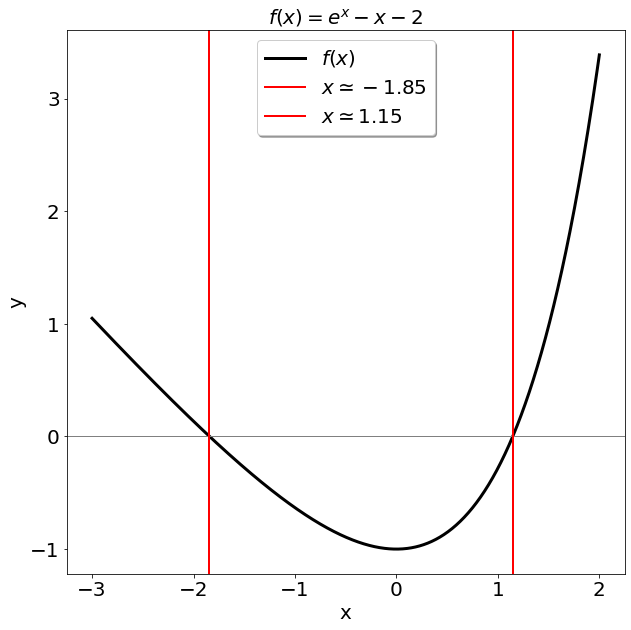

In [20]:
x = np.linspace(-3, 2, 1000) 
y = np.exp(x) - x -2

plt.figure(figsize=(10,10))
plt.plot(x,y,'k',label='$f(x)$',lw=3)
plt.xticks(size=20)
plt.yticks(size=20)
#plt.ylim(-1,1)
#plt.xlim(0,2)
plt.axhline(y = 0,color='gray',lw=1)
plt.axvline(x = -1.85,color='red',lw=2,label='$x \simeq -1.85$')
plt.axvline(x = 1.15,color='red',lw=2,label='$x \simeq 1.15$')
plt.title('$f(x)=e^x-x-2$',size=20)
plt.legend(fontsize=20,shadow=True)
plt.xlabel('x',size=20)
plt.ylabel('y',size=20);

##### <center> Caption: $f(x)$ y las potenciales ubicaciones de las 2  raíces, elegidas a ojo.

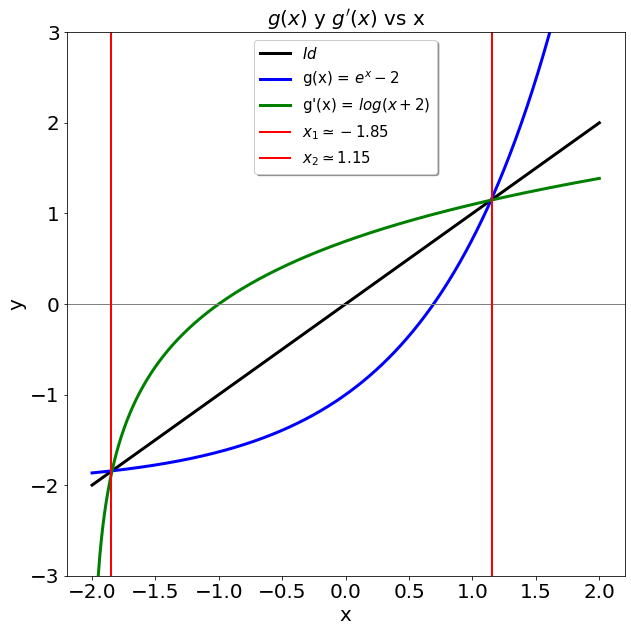

In [21]:
#despejando x de cada uno de los 2 términos:

x = np.linspace(-1.999, 2, 1000) #z(x) no está definida para x =< -2
y = np.exp(x) -2
z = np.log(x+2)

plt.figure(figsize=(10,10))
plt.plot(x,x,'k',label='$Id$',lw=3)
plt.plot(x,y,'b',label='g(x) = $e^x - 2$',lw=3)
plt.plot(x,z,'g',label="g'(x) = $log(x+2)$",lw=3)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid(False)
plt.ylim(-3,3)
#plt.xlim(0,2)
plt.axhline(y = 0,color='gray',lw=1)
plt.axvline(x = -1.85,color='red',lw=2,label='$x_1 \simeq -1.85$')
plt.axvline(x = 1.15,color='red',lw=2,label='$x_2 \simeq 1.15$')
plt.title("$g(x)$ y $g'(x)$ vs x",size=20)
plt.legend(fontsize=15,shadow=True)
plt.xlabel('x',size=20)
plt.ylabel('y',size=20);

##### <center> Caption: Las distintas funciones que aparecen de despejar de distintos términos $x$ y las raíces propuestas. </center>
#### *Comenzamos haciendo los 3 métodos para la forma con la $e^x$ ("1º") y luego repetimos para la que tiene ln(x) ("2º").*

En la última podemos notar la diferencia con el caso del Problema 4, y es que una de las raices está muy cerca del límite del dominio de $\tilde{g}(x)$, que no está definida para $x < -2$. Veamos como cambian los distintos métodos. <br>

### *i)* <center> $e^x - 2 -x = 0$ </center> <br>

**Bisección:** <br>
Mis brackets iniciales serán <br>
<center> $x_1 \in [-1.99,-1.5] \text{ y } x_2 \in [0.5,1.5]$ </center> <br>
Y los resultados de aplicar el mismo código pero cambiando $f$:

### Inicio código

In [22]:
#nuestra función será
def f(x):
    y = np.exp(x) - x -2
    return y

#1º raíz:

bisec(-1.99,-1.5)
           
print('La 1º raíz de f(x) es',xm,'con un error de',e,'tras',i,'iteraciones.')

#2º raíz:

bisec(0.5,1.5)
           
print('La 2º raíz de f(x) es',xm,'con un error de',e,'tras',i,'iteraciones.')

La 1º raíz de f(x) es -1.8414050102233888 con un error de 9.34600830282406e-07 tras 19 iteraciones.
La 2º raíz de f(x) es 1.146193504333496 con un error de 9.5367431640625e-07 tras 20 iteraciones.


### Fin código
**N-R:**
### Inicio código

In [23]:
#N-R: (para este método necesito calcular la derivada de f)

def g(x): #f'
    z = np.exp(x) - 1 #f'
    return z

#1º raíz:

NR(-1.99,-1.5)

print('La 1º raíz de f(x) es',xi,'con un error de',e,'tras',i,'iteraciones.')

#2º raíz:

NR(0.5,1.5)

print('La 2º raíz de f(x) es',xi,'con un error de',e,'tras',i,'iteraciones.')

La 1º raíz de f(x) es -1.841405660436961 con un error de 8.542605955952354e-08 tras 3 iteraciones.
La 2º raíz de f(x) es 1.1461932206205836 con un error de 3.80839151326029e-08 tras 4 iteraciones.


### Fin código
**Secante**
### Inicio código

In [24]:
#1º raíz:

sec(-1.99,-1.5)
    
print('La 1º raíz de f(x) es',xi,'con un error de',e,'tras',i,'iteraciones.')

#2º raíz:

sec(0.5,1.5)
    
print('La 2º raíz de f(x) es',xi,'con un error de',e,'tras',i,'iteraciones.')

La 1º raíz de f(x) es -1.8414056604370033 con un error de 1.2682372263483899e-08 tras 4 iteraciones.
La 2º raíz de f(x) es 1.1461932206434817 con un error de 3.0272667750352866e-07 tras 5 iteraciones.


### Fin código
### 2º forma: <center> $log(x + 2) -x=0$ </center> <br>
**Bisección:**
### Inicio código

In [25]:
def f(x):
    y = np.log(x+2) - x
    return y

#Bisección:

#1º raíz:

bisec(-1.99,-1.5)
           
print('La 1º raíz de f(x) es',xm,'con un error de',e,'tras',i,'iteraciones.')

#2º raíz:

bisec(0.5,1.5)
           
print('La 2º raíz de f(x) es',xm,'con un error de',e,'tras',i,'iteraciones.')

La 1º raíz de f(x) es -1.8414050102233888 con un error de 9.34600830282406e-07 tras 19 iteraciones.
La 2º raíz de f(x) es 1.146193504333496 con un error de 9.5367431640625e-07 tras 20 iteraciones.


### Fin código
**N-R:** <br>
Calculemos las derivadas $g'(x)$ y $\tilde{g}'(x)$, necesarias para el método: <br>
<center> $g'(x) = e^x - 1$ </center> <br>
<center> $\tilde{g}'(x) = \frac{1}{x+2} - 1$ </center> <br>
Y mis guesses iniciales serán
<center> $x_{1,0} = -1.75 \textit{ y } x_{2,0} = 1$ </center> <br>

### Inicio código

In [26]:
#N-R: (para este método necesito calcular la derivada de f)

def g(x): #f'
    z = 1/(x + 2) - 1 #f'
    return z

#1º raíz:

NR(-1.99,-1.5)

print('La 1º raíz de f(x) es',xi,'con un error de',e,'tras',i,'iteraciones.')

#2º raíz:

NR(0.5,1.5)

print('La 2º raíz de f(x) es',xi,'con un error de',e,'tras',i,'iteraciones.')

La 1º raíz de f(x) es -1.8414056604369617 con un error de 1.764307699936296e-08 tras 5 iteraciones.
La 2º raíz de f(x) es 1.146193220620586 con un error de 2.201773228183157e-07 tras 3 iteraciones.


### Fin código
**Secante:**
### Inicio código

In [27]:
#Secante (NR pero aproximando f'):

#1º raíz:

sec(-1.99,-1.5)
    
print('La 1º raíz de f(x) es',xi,'con un error de',e,'tras',i,'iteraciones.')

#2º raíz:

sec(0.5,1.5)
    
print('La 2º raíz de f(x) es',xi,'con un error de',e,'tras',i,'iteraciones.')

La 1º raíz de f(x) es -1.8414056604368043 con un error de 7.508631938435428e-09 tras 8 iteraciones.
La 2º raíz de f(x) es 1.146193220620549 con un error de 1.1034551050670416e-08 tras 4 iteraciones.


### Fin código